In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import re
from versions import versions

%matplotlib inline

In [2]:
patches = []
for i in versions:
    df = pd.read_json('http://ddragon.leagueoflegends.com/cdn/{}/data/en_US/champion.json'.format(i))
    champs = []
    for champ in df.index:
        temp_df = pd.DataFrame.from_dict(df.loc[champ, "data"]['stats'], orient='index').reset_index().pivot(columns='index')
        temp_df.columns = temp_df.columns.droplevel()
        temp_df[champ] = champ
        temp_df = temp_df.groupby(champ).mean()
        champs.append(temp_df.copy())
    df = df.merge(pd.concat(champs), left_index=True, right_index=True, how='outer').drop(columns=['format', 'data'])
    patches.append(df)
base_stats = pd.concat(patches, sort=False)

In [3]:
base_stats.version = base_stats.version.apply(lambda x: re.search('(\d\.\d{1,2})\.', x).group(1))


In [4]:
base_stats.version = base_stats.version.apply(lambda x: x[:2] + '0' + x[2:] if len(x) == 3 else x)

In [5]:
master_df = base_stats.copy()

In [6]:
master_df.reset_index(inplace=True)

In [7]:
master_df.rename(columns={'index':'champion'}, inplace=True)

In [8]:
master_df.attackspeed.fillna(master_df.attackspeedoffset.apply(lambda x: round(0.625 / (1 + x), 3)), inplace=True)

In [11]:
ffill = master_df[(master_df.version == '8.23')].attackspeed.to_list()
ffill.extend(ffill)
master_df.attackspeed.loc[master_df.attackspeed.isnull()] = ffill

ValueError: cannot set using a list-like indexer with a different length than the value

In [12]:
master_df.to_pickle('all_base_stats.pkl')

In [268]:
master_df[master_df.attackspeedoffset.notnull()].iloc[147]

champion                   Annie
type                    champion
version                     8.19
armor                      19.22
armorperlevel                  4
attackdamage               50.41
attackdamageperlevel       2.625
attackrange                  625
attackspeed                0.579
attackspeedperlevel         1.36
crit                           0
critperlevel                   0
hp                           524
hpperlevel                    88
hpregen                      5.5
hpregenperlevel             0.55
movespeed                    335
mp                           418
mpperlevel                    25
mpregen                        8
mpregenperlevel              0.8
spellblock                    30
spellblockperlevel           0.5
attackspeedoffset           0.08
Name: 3878, dtype: object

In [13]:
master_df.loc[master_df.attackspeed.isnull()].attackspeed

Series([], Name: attackspeed, dtype: float64)

In [15]:
master_df[(master_df.version == '8.24')].attackspeed - master_df[(master_df.version == '8.23')].attackspeed

3166   NaN
3167   NaN
3168   NaN
3169   NaN
3170   NaN
        ..
3444   NaN
3445   NaN
3446   NaN
3447   NaN
3448   NaN
Name: attackspeed, Length: 283, dtype: float64

In [16]:
master_df.iloc[139]

champion                     Zac
type                    champion
version                     9.21
armor                         33
armorperlevel                3.5
attackdamage                  60
attackdamageperlevel         3.4
attackrange                  175
attackspeed                0.736
attackspeedperlevel          1.6
crit                           0
critperlevel                   0
hp                           615
hpperlevel                    95
hpregen                        8
hpregenperlevel              0.5
movespeed                    340
mp                             0
mpperlevel                     0
mpregen                        0
mpregenperlevel                0
spellblock                    32
spellblockperlevel          1.25
attackspeedoffset            NaN
Name: 139, dtype: object

In [306]:
master_df[(master_df.version == '8.20')].attackspeed.to_csv('2.csv', index=False)
master_df[(master_df.version == '8.21')].attackspeed.to_csv('3.csv', index=False)

C:\Users\BeRT2\Anaconda3\envs\python\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.
C:\Users\BeRT2\Anaconda3\envs\python\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  


In [17]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19020 entries, 0 to 19019
Data columns (total 24 columns):
champion                19020 non-null object
type                    19020 non-null object
version                 19020 non-null object
armor                   19020 non-null float64
armorperlevel           19020 non-null float64
attackdamage            19020 non-null float64
attackdamageperlevel    19020 non-null float64
attackrange             19020 non-null float64
attackspeed             19020 non-null float64
attackspeedperlevel     19020 non-null float64
crit                    19020 non-null float64
critperlevel            19020 non-null float64
hp                      19020 non-null float64
hpperlevel              19020 non-null float64
hpregen                 19020 non-null float64
hpregenperlevel         19020 non-null float64
movespeed               19020 non-null float64
mp                      19020 non-null float64
mpperlevel              19020 non-null float64
m

Summary Stats

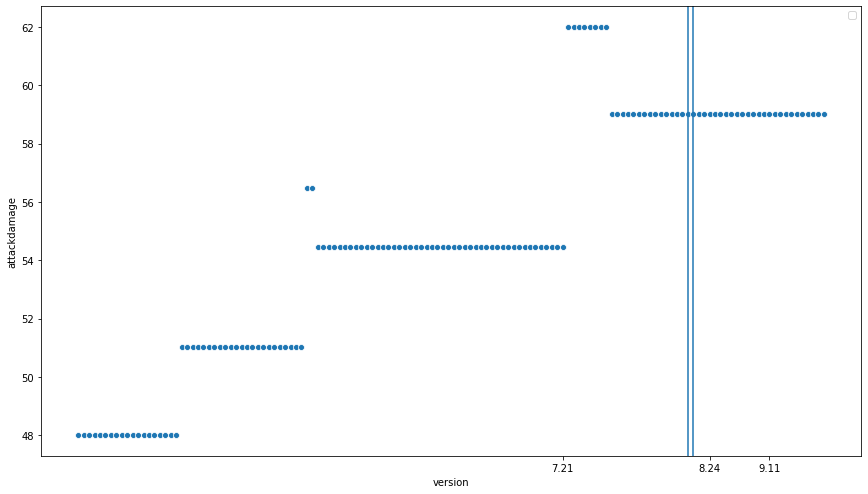

In [23]:
plt.figure(figsize=[14.70, 8.27])
sb.scatterplot(data=master_df[master_df.champion == 'Quinn'].groupby('version').mean().reset_index(), y='attackdamage', x='version')
plt.xticks(['7.21','8.24','9.11'])
plt.axvline(x='8.20')
plt.axvline(x='8.21')
plt.legend('');

In [ ]:
plt.figure(figsize=[14.70, 8.27])
sb.scatterplot(data=master_df.groupby('version').mean().reset_index(), y='attackspeed', x='version')
plt.xticks(['7.21','8.24','9.11'])
plt.axvline(x='8.23')
plt.legend('');

In [ ]:
fig, ax = plt.subplots(figsize=[14.70, 8.27])
master_df.groupby(['version', 'champion']).mean().movespeed.unstack().plot(ax=ax)
ax.legend('');

In [26]:
master_df.champion.unique().tolist()

['Aatrox',
 'Ahri',
 'Akali',
 'Alistar',
 'Amumu',
 'Anivia',
 'Annie',
 'Ashe',
 'AurelionSol',
 'Azir',
 'Bard',
 'Blitzcrank',
 'Brand',
 'Braum',
 'Caitlyn',
 'Camille',
 'Cassiopeia',
 'Chogath',
 'Corki',
 'Darius',
 'Diana',
 'DrMundo',
 'Draven',
 'Ekko',
 'Elise',
 'Evelynn',
 'Ezreal',
 'Fiddlesticks',
 'Fiora',
 'Fizz',
 'Galio',
 'Gangplank',
 'Garen',
 'Gnar',
 'Gragas',
 'Graves',
 'Hecarim',
 'Heimerdinger',
 'Illaoi',
 'Irelia',
 'Ivern',
 'Janna',
 'JarvanIV',
 'Jax',
 'Jayce',
 'Jhin',
 'Jinx',
 'Kaisa',
 'Kalista',
 'Karma',
 'Karthus',
 'Kassadin',
 'Katarina',
 'Kayle',
 'Kayn',
 'Kennen',
 'Khazix',
 'Kindred',
 'Kled',
 'KogMaw',
 'Leblanc',
 'LeeSin',
 'Leona',
 'Lissandra',
 'Lucian',
 'Lulu',
 'Lux',
 'Malphite',
 'Malzahar',
 'Maokai',
 'MasterYi',
 'MissFortune',
 'MonkeyKing',
 'Mordekaiser',
 'Morgana',
 'Nami',
 'Nasus',
 'Nautilus',
 'Neeko',
 'Nidalee',
 'Nocturne',
 'Nunu',
 'Olaf',
 'Orianna',
 'Ornn',
 'Pantheon',
 'Poppy',
 'Pyke',
 'Qiyana',
 'Qui